In [89]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from algo_implementation import logistic_regression
import matplotlib.pyplot as plt

In [90]:

final_comparison = pd.DataFrame(columns=['Type','Model', 'Accuracy', 'Precision', 'Recall'])

In [114]:


# Load train and test datasets
train_df = pd.read_csv('datasets\\train_dataset2.csv').drop(columns=['Unnamed: 0'])
test_df = pd.read_csv('datasets\\test_dataset2.csv').drop(columns=['Unnamed: 0'])

# Extract features and target variable
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

# Train and evaluate logistic regression
lr = logistic_regression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

# Train and evaluate logistic regression - regularized L1
lr = logistic_regression(regularization='l1', C=0.3)
lr.fit(X_train, y_train)
lr_pred_l1 = lr.predict(X_test)
lr_acc_l1 = accuracy_score(y_test, lr_pred_l1)
lr_precision_l1 = precision_score(y_test, lr_pred_l1)
lr_recall_l1 = recall_score(y_test, lr_pred_l1)

# Train and evaluate logistic regression - regularized L2
lr = logistic_regression(regularization='l2', C=2)
lr.fit(X_train, y_train)
lr_pred_l2 = lr.predict(X_test)
lr_acc_l2 = accuracy_score(y_test, lr_pred_l2)
lr_precision_l2 = precision_score(y_test, lr_pred_l2)
lr_recall_l2 = recall_score(y_test, lr_pred_l2)

# Train and evaluate LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
lda_acc = accuracy_score(y_test, lda_pred)
lda_precision = precision_score(y_test, lda_pred)
lda_recall = recall_score(y_test, lda_pred)

# Train and evaluate QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
qda_acc = accuracy_score(y_test, qda_pred)
qda_precision = precision_score(y_test, qda_pred)
qda_recall = recall_score(y_test, qda_pred)

# Train and evaluate KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)

# Print evaluation results
print('Logistic Regression:')
print(f'Accuracy: {lr_acc}')
print(f'Precision: {lr_precision}')
print(f'Recall: {lr_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Original Data', 'Model': 'Logistic Regression', 'Accuracy': lr_acc, 'Precision': lr_precision, 'Recall': lr_recall}, index=[0])], ignore_index=True)
print('Logistic Regression - L1:')
print(f'Accuracy: {lr_acc_l1}')
print(f'Precision: {lr_precision_l1}')
print(f'Recall: {lr_recall_l1}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Original Data', 'Model': 'Logistic Regression - L1', 'Accuracy': lr_acc_l1, 'Precision': lr_precision_l1, 'Recall': lr_recall_l1}, index=[0])], ignore_index=True)
print('Logistic Regression - L2:')
print(f'Accuracy: {lr_acc_l2}')
print(f'Precision: {lr_precision_l2}')
print(f'Recall: {lr_recall_l2}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Original Data', 'Model': 'Logistic Regression - L2', 'Accuracy': lr_acc_l2, 'Precision': lr_precision_l2, 'Recall': lr_recall_l2}, index=[0])], ignore_index=True)
print('LDA:')
print(f'Accuracy: {lda_acc}')
print(f'Precision: {lda_precision}')
print(f'Recall: {lda_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Original Data', 'Model': 'LDA', 'Accuracy': lda_acc, 'Precision': lda_precision, 'Recall': lda_recall}, index=[0])], ignore_index=True)
print('QDA:')
print(f'Accuracy: {qda_acc}')
print(f'Precision: {qda_precision}')
print(f'Recall: {qda_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Original Data', 'Model': 'QDA', 'Accuracy': qda_acc, 'Precision': qda_precision, 'Recall': qda_recall}, index=[0])], ignore_index=True)
print('KNN:')
print(f'Accuracy: {knn_acc}')
print(f'Precision: {knn_precision}')
print(f'Recall: {knn_recall}')
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Original Data', 'Model': 'KNN', 'Accuracy': knn_acc, 'Precision': knn_precision, 'Recall': knn_recall}, index=[0])], ignore_index=True)

Logistic Regression:
Accuracy: 0.8541666666666666
Precision: 0.8939393939393939
Recall: 0.8939393939393939

Logistic Regression - L1:
Accuracy: 0.84375
Precision: 0.8805970149253731
Recall: 0.8939393939393939

Logistic Regression - L2:
Accuracy: 0.8333333333333334
Precision: 0.8676470588235294
Recall: 0.8939393939393939

LDA:
Accuracy: 0.8229166666666666
Precision: 0.8266666666666667
Recall: 0.9393939393939394

QDA:
Accuracy: 0.8333333333333334
Precision: 0.8787878787878788
Recall: 0.8787878787878788

KNN:
Accuracy: 0.875
Precision: 0.9354838709677419
Recall: 0.8787878787878788


# L1 and L2 regularizations

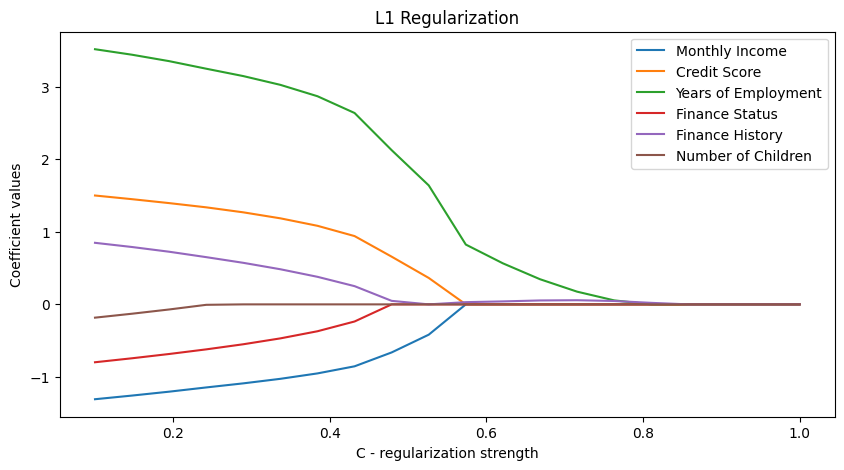

In [115]:
import numpy as np
C_params = np.linspace(0.1, 1, num=20)
coefs = []
for C in C_params:
    m = logistic_regression(regularization='l1', C=C)
    m.fit(X_train, y_train)
    coefs.append(m.coef_)

# coefs = np.array(coefs)

# Plot the coefficients as a function of C
plt.figure(figsize=(10, 5))
plt.plot(C_params, coefs)
plt.xlabel('C - regularization strength')
plt.ylabel('Coefficient values')
plt.title('L1 Regularization')
plt.legend(X_train.columns, loc='upper right')
plt.show()

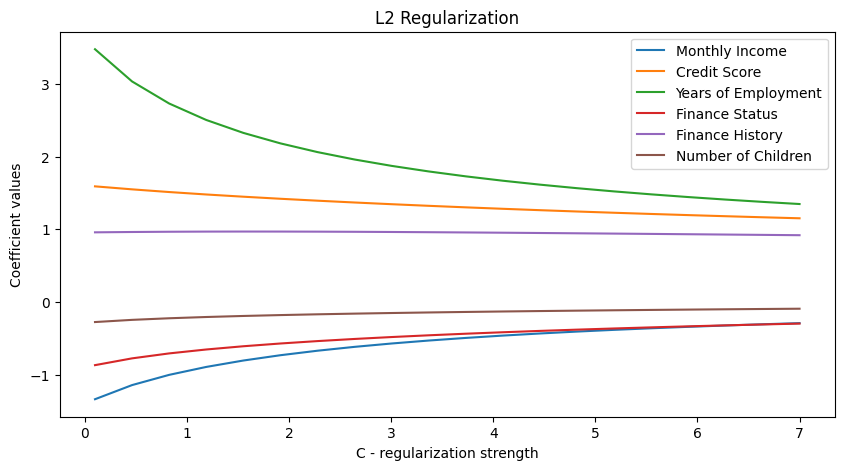

In [116]:
import numpy as np
C_params = np.linspace(0.1, 7, num=20)
coefs = []
for C in C_params:
    m = logistic_regression(regularization='l2', C=C)
    m.fit(X_train, y_train)
    coefs.append(m.coef_)

# coefs = np.array(coefs)

# Plot the coefficients as a function of C
plt.figure(figsize=(10, 5))
plt.plot(C_params, coefs)
plt.xlabel('C - regularization strength')
plt.ylabel('Coefficient values')
plt.title('L2 Regularization')
plt.legend(X_train.columns, loc='upper right')
plt.show()

# Interactions

In [94]:
from power_qcut import qcut_fold_validation, prepare_cols_comb

In [95]:
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

In [96]:
basic_cols = list(X_train.columns)

In [97]:
col1 = prepare_cols_comb(list(prepare_cols_comb(basic_cols)) + basic_cols)

In [98]:
data = pd.concat([X_train, y_train], axis=1)

In [99]:
import numpy as np
res1 = qcut_fold_validation(data, 4, 'Car', col1, np.mean, 4)

100%|██████████| 1046/1046 [00:01<00:00, 1006.71it/s]


In [100]:
res1.reset_index(drop=True, inplace=True)

In [101]:
res1.sort_values("mono").feature[1]

'Monthly_Income * Finance_Status + Monthly_Income - Years_of_Employment'

In [102]:
res1.sort_values("mono").feature[4]

'Monthly_Income * Credit_Score - Credit_Score'

In [103]:
res1.sort_values("mono").feature.loc[11]

'Monthly_Income / Finance_History - Years_of_Employment - Finance_History'

In [104]:
X_train['Qcut_Var_1'] = X_train.eval('Monthly_Income * Finance_History')
X_train['Qcut_Var_1'] = (X_train['Qcut_Var_1'] - X_train['Qcut_Var_1'].mean()) / X_train['Qcut_Var_1'].std()
X_test['Qcut_Var_1'] = X_test.eval('Monthly_Income * Finance_History')
X_test['Qcut_Var_1'] = (X_test['Qcut_Var_1'] - X_train['Qcut_Var_1'].mean()) / X_train['Qcut_Var_1'].std()
X_train['Qcut_Var_2'] = X_train.eval('Monthly_Income * Number_of_Children')
X_train['Qcut_Var_2'] = (X_train['Qcut_Var_2'] - X_train['Qcut_Var_2'].mean()) / X_train['Qcut_Var_2'].std()
X_test['Qcut_Var_2'] = X_test.eval('Monthly_Income * Number_of_Children')
X_test['Qcut_Var_2'] = (X_test['Qcut_Var_2'] - X_train['Qcut_Var_2'].mean()) / X_train['Qcut_Var_2'].std()
X_train['Qcut_Var_3'] = X_train.eval('Finance_Status / Years_of_Employment')
X_train['Qcut_Var_3'] = (X_train['Qcut_Var_3'] - X_train['Qcut_Var_3'].mean()) / X_train['Qcut_Var_3'].std()
X_test['Qcut_Var_3'] = X_test.eval('Finance_Status / Years_of_Employment')
X_test['Qcut_Var_3'] = (X_test['Qcut_Var_3'] - X_train['Qcut_Var_3'].mean()) / X_train['Qcut_Var_3'].std()

In [105]:
final_comparison

,Type,Model,Accuracy,Precision,Recall
0,Original Data,Logistic Regression,0.854167,0.893939,0.893939
1,Original Data,Logistic Regression - L1,0.843750,0.880597,0.893939
2,Original Data,Logistic Regression - L2,0.833333,0.867647,0.893939
3,Original Data,LDA,0.822917,0.826667,0.939394
4,Original Data,QDA,0.833333,0.878788,0.878788
5,Original Data,KNN,0.875000,0.935484,0.878788


In [106]:
X_train

,Monthly_Income,Credit_Score,Years_of_Employment,Finance_Status,Finance_History,Number_of_Children,Qcut_Var_1,Qcut_Var_2,Qcut_Var_3
0,-0.229254,-0.105382,-0.151055,-0.069367,0.650403,-0.810921,-0.314897,0.060346,0.050841
1,0.338940,2.935116,2.963319,3.127068,0.650403,-0.810921,0.121507,-0.284127,0.382966
2,0.108591,1.172509,1.016835,-0.069367,0.650403,1.329241,-0.055414,0.029273,-0.243055
3,-0.313715,-0.736983,-0.540352,-0.069367,0.650403,0.259160,-0.379768,-0.139424,-0.133510
4,-0.375141,-1.324518,-0.151055,-1.134845,-1.705773,0.259160,0.616842,-0.151326,3.981209
...,...,...,...,...,...,...,...,...,...
379,-0.375141,-0.443215,-1.318946,-1.134845,-1.705773,-0.810921,0.616842,0.148792,0.274398
380,-0.259967,0.291205,-0.151055,-0.069367,0.650403,2.399322,-0.338487,-0.544964,0.050841
381,-0.006583,1.172509,1.016835,-0.069367,0.650403,-0.810921,-0.143874,-0.074650,-0.243055
382,-0.137114,0.291205,-0.151055,-0.069367,0.650403,-0.810921,-0.244129,0.004486,0.050841


In [107]:

# Train and evaluate logistic regression
lr = logistic_regression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

# Train and evaluate logistic regression with L1 regularization
lr_l1 = logistic_regression(regularization='l1', C=0.3)
lr_l1.fit(X_train, y_train)
lr_l1_pred = lr_l1.predict(X_test)
lr_l1_acc = accuracy_score(y_test, lr_l1_pred)
lr_l1_precision = precision_score(y_test, lr_l1_pred)
lr_l1_recall = recall_score(y_test, lr_l1_pred)

# Train and evaluate logistic regression with L2 regularization
lr_l2 = logistic_regression(regularization='l2', C=2)
lr_l2.fit(X_train, y_train)
lr_l2_pred = lr_l2.predict(X_test)
lr_l2_acc = accuracy_score(y_test, lr_l2_pred)
lr_l2_precision = precision_score(y_test, lr_l2_pred)
lr_l2_recall = recall_score(y_test, lr_l2_pred)

# Train and evaluate LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
lda_acc = accuracy_score(y_test, lda_pred)
lda_precision = precision_score(y_test, lda_pred)
lda_recall = recall_score(y_test, lda_pred)

# Train and evaluate QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
qda_acc = accuracy_score(y_test, qda_pred)
qda_precision = precision_score(y_test, qda_pred)
qda_recall = recall_score(y_test, qda_pred)

# Train and evaluate KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)

# Print evaluation results
print('Logistic Regression:')
print(f'Accuracy: {lr_acc}')
print(f'Precision: {lr_precision}')
print(f'Recall: {lr_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Add 3 vars', 'Model': 'Logistic Regression', 'Accuracy': lr_acc, 'Precision': lr_precision, 'Recall': lr_recall}, index=[0])], ignore_index=True)
print('Logistic Regression with L1 regularization:')
print(f'Accuracy: {lr_l1_acc}')
print(f'Precision: {lr_l1_precision}')
print(f'Recall: {lr_l1_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Add 3 vars', 'Model': 'Logistic Regression - L1', 'Accuracy': lr_l1_acc, 'Precision': lr_l1_precision, 'Recall': lr_l1_recall}, index=[0])], ignore_index=True)
print('Logistic Regression with L2 regularization:')
print(f'Accuracy: {lr_l2_acc}')
print(f'Precision: {lr_l2_precision}')
print(f'Recall: {lr_l2_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Add 3 vars', 'Model': 'Logistic Regression - L2', 'Accuracy': lr_l2_acc, 'Precision': lr_l2_precision, 'Recall': lr_l2_recall}, index=[0])], ignore_index=True)
print('LDA:')
print(f'Accuracy: {lda_acc}')
print(f'Precision: {lda_precision}')
print(f'Recall: {lda_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Add 3 vars', 'Model': 'LDA', 'Accuracy': lda_acc, 'Precision': lda_precision, 'Recall': lda_recall}, index=[0])], ignore_index=True)
print('QDA:')
print(f'Accuracy: {qda_acc}')
print(f'Precision: {qda_precision}')
print(f'Recall: {qda_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Add 3 vars', 'Model': 'QDA', 'Accuracy': qda_acc, 'Precision': qda_precision, 'Recall': qda_recall}, index=[0])], ignore_index=True)
print('KNN:')
print(f'Accuracy: {knn_acc}')
print(f'Precision: {knn_precision}')
print(f'Recall: {knn_recall}')
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Add 3 vars', 'Model': 'KNN', 'Accuracy': knn_acc, 'Precision': knn_precision, 'Recall': knn_recall}, index=[0])], ignore_index=True)


Logistic Regression:
Accuracy: 0.8541666666666666
Precision: 0.8939393939393939
Recall: 0.8939393939393939

Logistic Regression with L1 regularization:
Accuracy: 0.8541666666666666
Precision: 0.8939393939393939
Recall: 0.8939393939393939

Logistic Regression with L2 regularization:
Accuracy: 0.8541666666666666
Precision: 0.8939393939393939
Recall: 0.8939393939393939

LDA:
Accuracy: 0.84375
Precision: 0.8493150684931506
Recall: 0.9393939393939394

QDA:
Accuracy: 0.7395833333333334
Precision: 1.0
Recall: 0.6212121212121212

KNN:
Accuracy: 0.875
Precision: 0.9090909090909091
Recall: 0.9090909090909091


In [108]:
%%capture
new_X_train = pd.DataFrame()
new_X_test = pd.DataFrame()

for i, col_val in enumerate(list(res1.feature)[:20]):
    new_X_train[f'Q_var_{i}'] = X_train.eval(col_val)
    new_X_test[f'Q_var_{i}'] = X_test.eval(col_val)

In [109]:
from preprocessor import Preprocessor

p = Preprocessor()
vif_coefs = p.vif(new_X_train)
colnames = vif_coefs[vif_coefs['VIF'] >= 10]['variables']
X_train, X_test = new_X_train.drop(colnames, axis=1 ), new_X_test.drop(colnames, axis=1 )
print(colnames)

0      Q_var_0
1      Q_var_1
4      Q_var_4
5      Q_var_5
7      Q_var_7
8      Q_var_8
11    Q_var_11
12    Q_var_12
13    Q_var_13
14    Q_var_14
15    Q_var_15
16    Q_var_16
17    Q_var_17
18    Q_var_18
19    Q_var_19
Name: variables, dtype: object


c:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [110]:

# Train and evaluate logistic regression
lr = logistic_regression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

# Train and evaluate logistic regression with L1 regularization
lr_l1 = logistic_regression(regularization='l1', C=0.3)
lr_l1.fit(X_train, y_train)
lr_l1_pred = lr_l1.predict(X_test)
lr_l1_acc = accuracy_score(y_test, lr_l1_pred)
lr_l1_precision = precision_score(y_test, lr_l1_pred)
lr_l1_recall = recall_score(y_test, lr_l1_pred)

# Train and evaluate logistic regression with L2 regularization
lr_l2 = logistic_regression(regularization='l2', C=2)
lr_l2.fit(X_train, y_train)
lr_l2_pred = lr_l2.predict(X_test)
lr_l2_acc = accuracy_score(y_test, lr_l2_pred)
lr_l2_precision = precision_score(y_test, lr_l2_pred)
lr_l2_recall = recall_score(y_test, lr_l2_pred)

# Train and evaluate LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
lda_acc = accuracy_score(y_test, lda_pred)
lda_precision = precision_score(y_test, lda_pred)
lda_recall = recall_score(y_test, lda_pred)

# Train and evaluate QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
qda_acc = accuracy_score(y_test, qda_pred)
qda_precision = precision_score(y_test, qda_pred)
qda_recall = recall_score(y_test, qda_pred)

# Train and evaluate KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)

# Print evaluation results
print('Logistic Regression:')
print(f'Accuracy: {lr_acc}')
print(f'Precision: {lr_precision}')
print(f'Recall: {lr_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Only artificial vars', 'Model': 'Logistic Regression', 'Accuracy': lr_acc, 'Precision': lr_precision, 'Recall': lr_recall}, index=[0])], ignore_index=True)
print('Logistic Regression with L1 regularization:')
print(f'Accuracy: {lr_l1_acc}')
print(f'Precision: {lr_l1_precision}')
print(f'Recall: {lr_l1_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Only artificial vars', 'Model': 'Logistic Regression - L1', 'Accuracy': lr_l1_acc, 'Precision': lr_l1_precision, 'Recall': lr_l1_recall}, index=[0])], ignore_index=True)
print('Logistic Regression with L2 regularization:')
print(f'Accuracy: {lr_l2_acc}')
print(f'Precision: {lr_l2_precision}')
print(f'Recall: {lr_l2_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Only artificial vars', 'Model': 'Logistic Regression - L2', 'Accuracy': lr_l2_acc, 'Precision': lr_l2_precision, 'Recall': lr_l2_recall}, index=[0])], ignore_index=True)
print('LDA:')
print(f'Accuracy: {lda_acc}')
print(f'Precision: {lda_precision}')
print(f'Recall: {lda_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Only artificial vars', 'Model': 'LDA', 'Accuracy': lda_acc, 'Precision': lda_precision, 'Recall': lda_recall}, index=[0])], ignore_index=True)
print('QDA:')
print(f'Accuracy: {qda_acc}')
print(f'Precision: {qda_precision}')
print(f'Recall: {qda_recall}')
print()
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Only artificial vars', 'Model': 'QDA', 'Accuracy': qda_acc, 'Precision': qda_precision, 'Recall': qda_recall}, index=[0])], ignore_index=True)
print('KNN:')
print(f'Accuracy: {knn_acc}')
print(f'Precision: {knn_precision}')
print(f'Recall: {knn_recall}')
final_comparison = pd.concat([final_comparison, pd.DataFrame({'Type': 'Only artificial vars', 'Model': 'KNN', 'Accuracy': knn_acc, 'Precision': knn_precision, 'Recall': knn_recall}, index=[0])], ignore_index=True)

Logistic Regression:
Accuracy: 0.875
Precision: 0.9354838709677419
Recall: 0.8787878787878788

Logistic Regression with L1 regularization:
Accuracy: 0.7395833333333334
Precision: 0.7469879518072289
Recall: 0.9393939393939394

Logistic Regression with L2 regularization:
Accuracy: 0.8854166666666666
Precision: 0.9365079365079365
Recall: 0.8939393939393939

LDA:
Accuracy: 0.875
Precision: 0.921875
Recall: 0.8939393939393939

QDA:
Accuracy: 0.6145833333333334
Precision: 0.9393939393939394
Recall: 0.4696969696969697

KNN:
Accuracy: 0.8854166666666666
Precision: 0.9365079365079365
Recall: 0.8939393939393939


In [111]:
final_comparison

,Type,Model,Accuracy,Precision,Recall
0,Original Data,Logistic Regression,0.854167,0.893939,0.893939
1,Original Data,Logistic Regression - L1,0.843750,0.880597,0.893939
2,Original Data,Logistic Regression - L2,0.833333,0.867647,0.893939
3,Original Data,LDA,0.822917,0.826667,0.939394
4,Original Data,QDA,0.833333,0.878788,0.878788
5,Original Data,KNN,0.875000,0.935484,0.878788
6,Add 3 vars,Logistic Regression,0.854167,0.893939,0.893939
7,Add 3 vars,Logistic Regression - L1,0.854167,0.893939,0.893939
8,Add 3 vars,Logistic Regression - L2,0.854167,0.893939,0.893939
9,Add 3 vars,LDA,0.843750,0.849315,0.939394


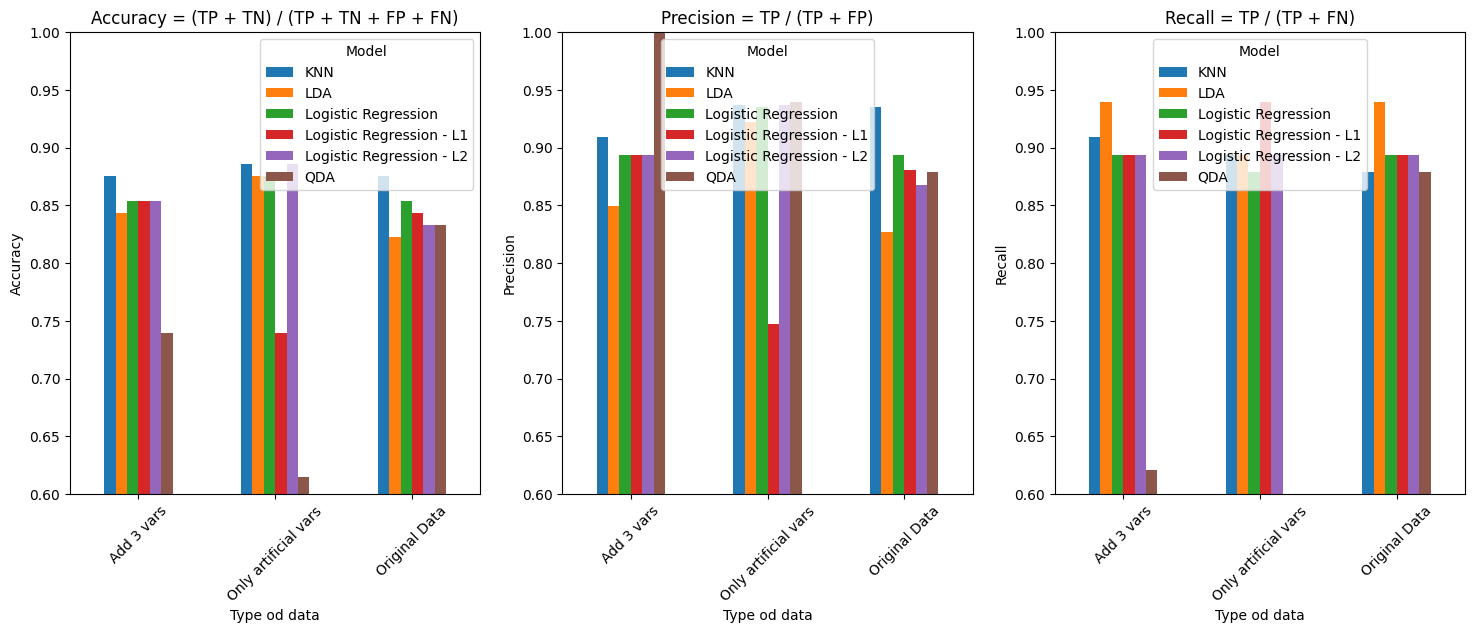

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

df = final_comparison.copy()

for idx, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    grouped_df = df.groupby(['Type', 'Model'])[metric].mean().unstack()
    grouped_df.plot(kind='bar', ax=axes[idx], title=metric)
    axes[idx].set_ylim(0.6, 1)
    axes[idx].set_ylabel(metric)
    axes[idx].legend(title='Model')
    axes[idx].set_xlabel('Type od data')
    for tick in axes[idx].get_xticklabels():
        tick.set_rotation(45)
    # plot definion of metrics
    if metric == 'Accuracy':
        axes[idx].set_title('Accuracy = (TP + TN) / (TP + TN + FP + FN)')
    elif metric == 'Precision':
        axes[idx].set_title('Precision = TP / (TP + FP)')
    elif metric == 'Recall':
        axes[idx].set_title('Recall = TP / (TP + FN)')


plt.show()